##Regression analysis
In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the
**'outcome variable'**) ; nd one or more independent variables (often called **'predictors', 'covariates', or 'features'**). 

### Summary 

1/Architecture of a neural network regression model

2/ Input shapes and output shapes of a regression model (features and labels)

3/ Creating custom data to view and fit

4/ Steps in modelling

5/ Creating a model, compiling a model, fitting a model, evaluating a model

6/ Different evaluation methods

7/ Saving and loading models

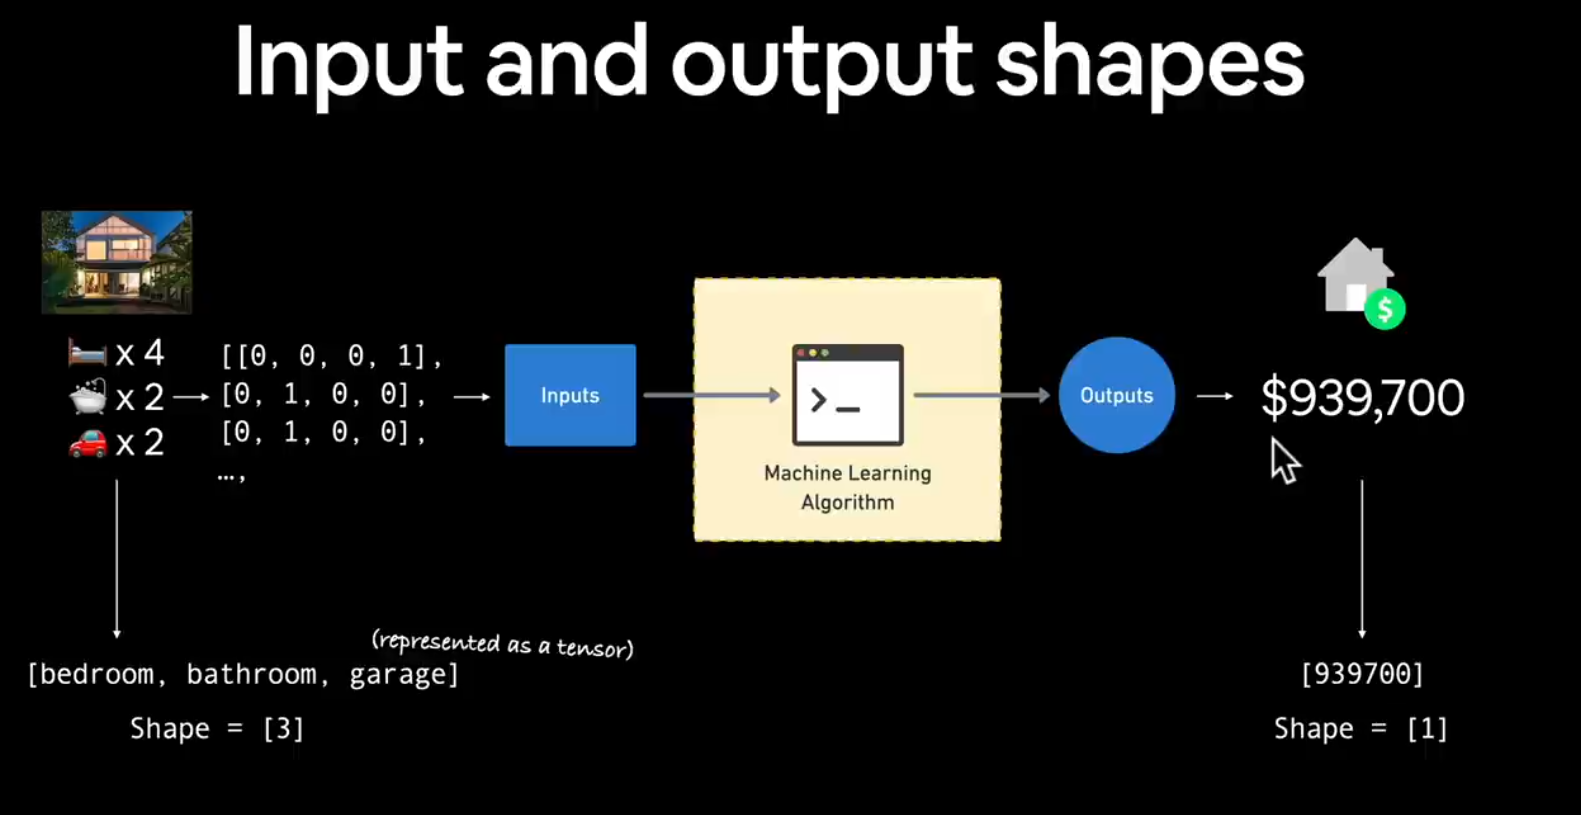

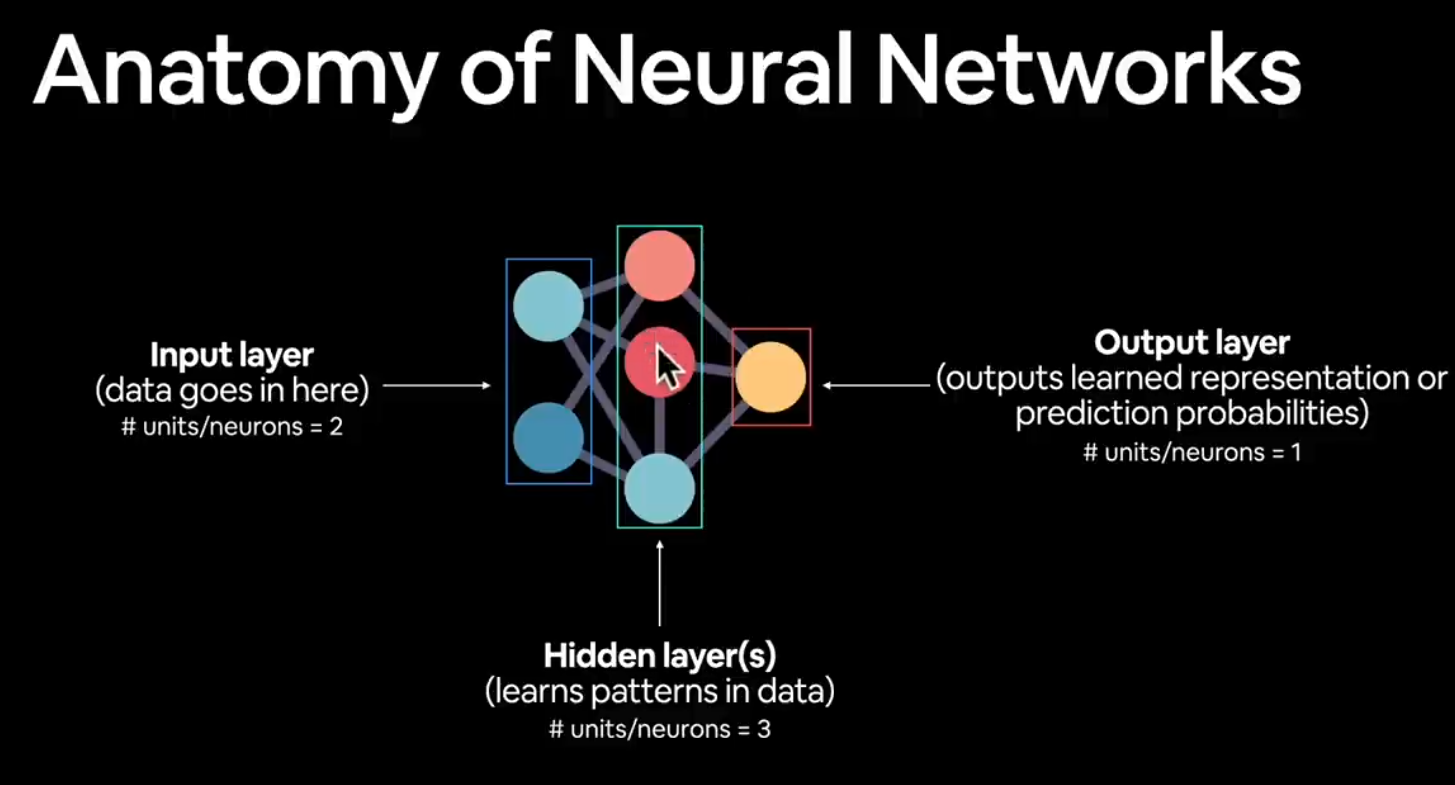

So there is :
1.   An input layer.
2.   Hidden layer(s).this is were ou NN learns patterns and weights.
3.   Output layer.

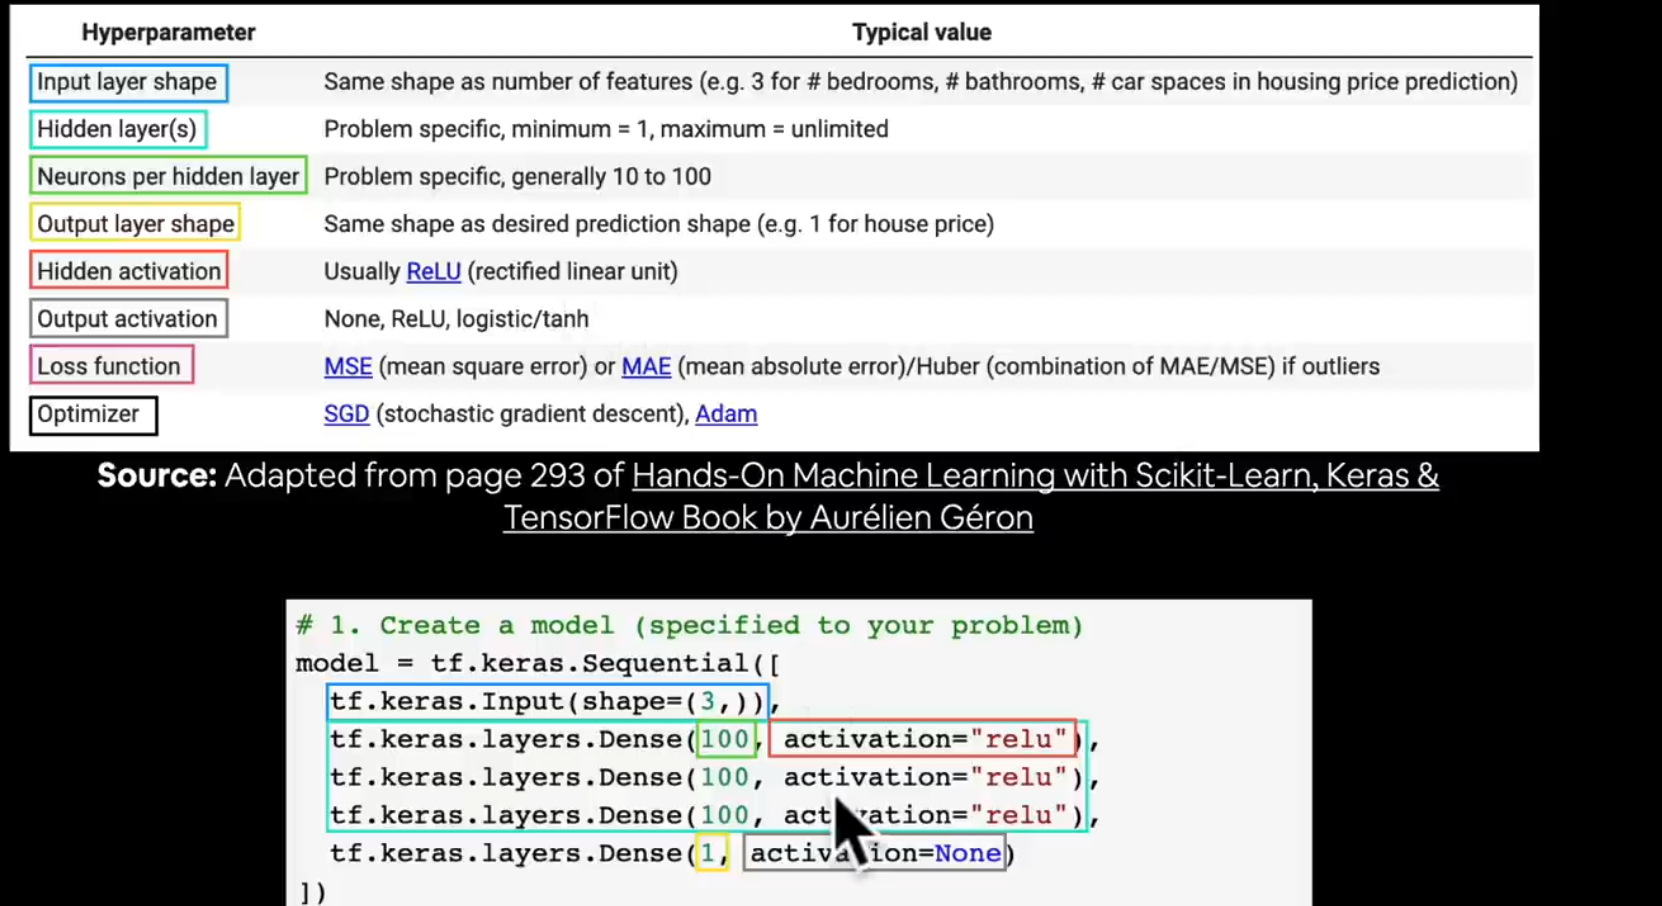

1. Create a model:

  1 x input layer

  n x Hidden layers (each hidden layer has y neurons and the activation function used here is 'relu')

  1 x output layer (1 neuron without an activation function)

2. Compile the model:

  Loss function: This measures how incorrect the predictions of the neural network are during the learning process of the relationship between the features and labels.

  Optimizer: In our case, we use the SGD/Adam optimizer. It guides the neural network on how to improve the patterns to reduce the loss function.

3. Fit the model:

  This involves instructing the model to analyze a whole bunch of different examples in the training data for a total of 100 epochs (laps).





There are many definitions for a regression problem, but in our case, we're going to simplify it: predicting a numerical variable based on a combination of other variables, including predicting a number.

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

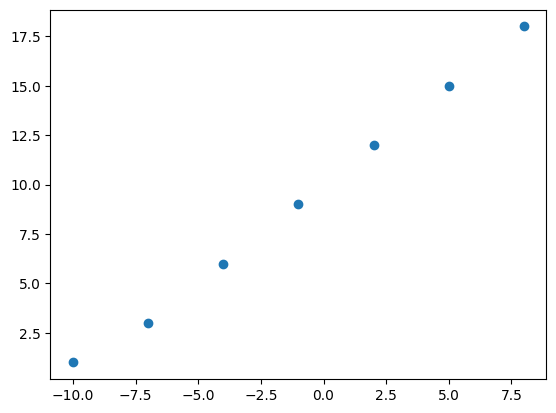

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creating features array :
X=np.array([-10.0,-7.0,-4.0,-1.0,2.0,5.0,8.0])
# Creating labels array :
y=np.array([1.0,3.0,6.0,9.0,12.0,15.0,18.0])
plt.scatter(X,y)

Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
X_house=np.array(["Bedrooms","Garage","Toilets"]);
y_house=np.array([999555]);
X_house.shape,y_house.shape # So there is 3 features and 1 label

((3,), (1,))

Steps in modelling with TensorFlow
1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our
model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).


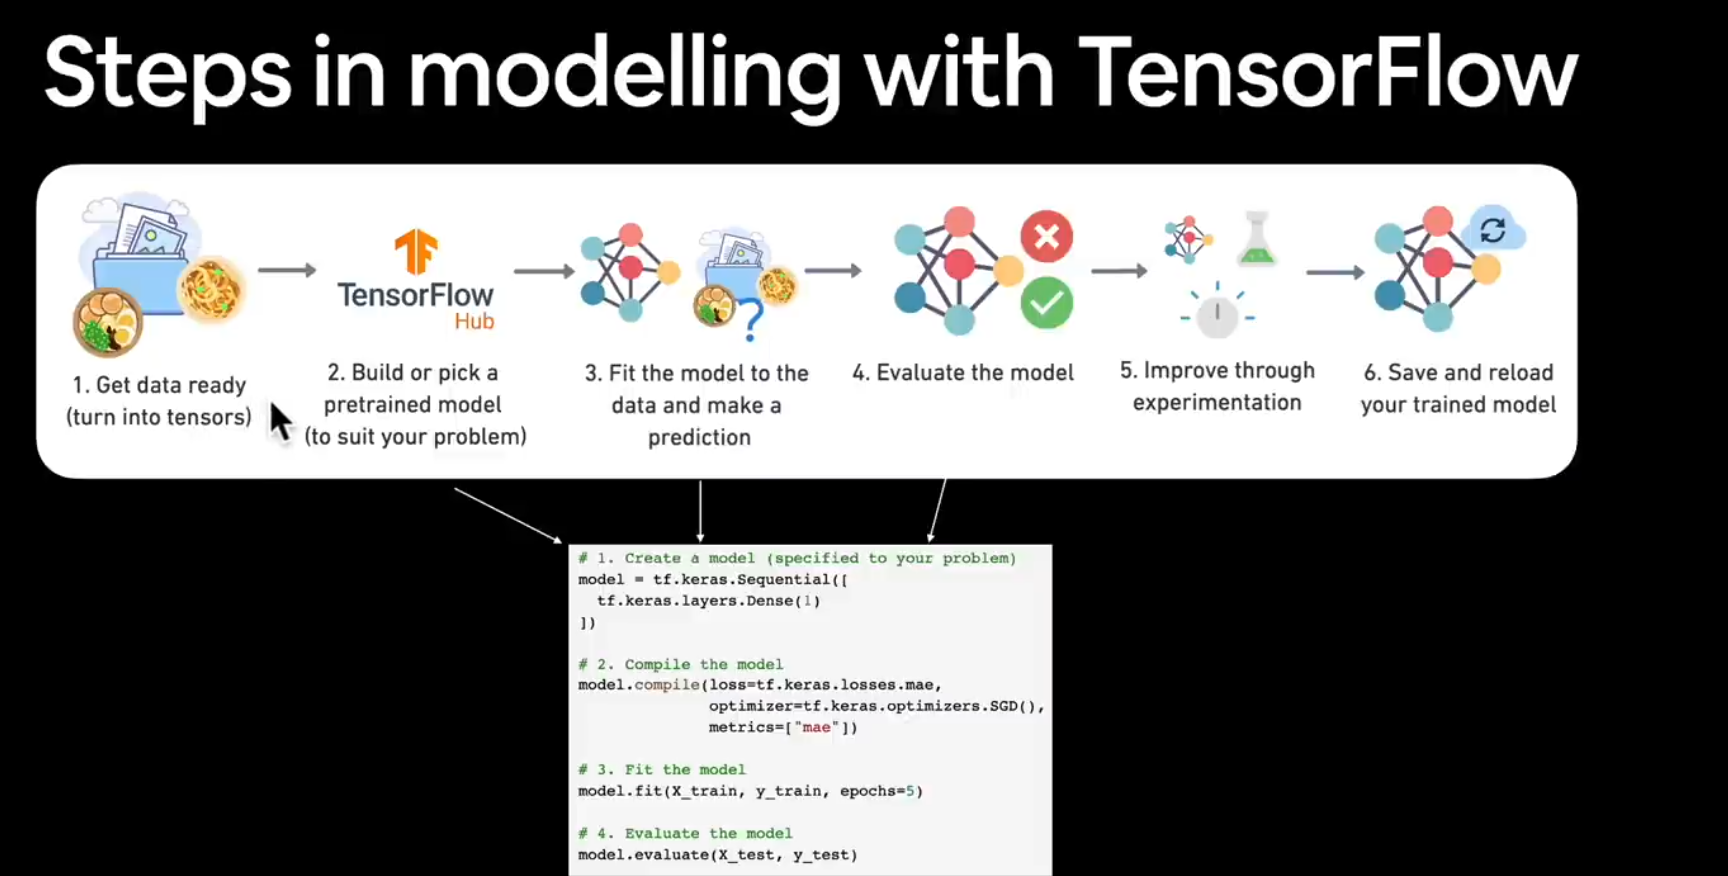

# Sequential vs functional APIS:

The Sequential API and the Functional API are two different ways to define and build models in Keras, a high-level deep learning library. Each API has its own advantages and use cases.

1/ Sequential API:

  The Sequential API is a straightforward and simple way to build sequential models, **where each layer in the model has exactly one input tensor and one output tensor** .

   You can create a Sequential model by initializing an instance of the Sequential class and then adding layers to it one by one. It is best suited for models that have a linear stack of layers, such as feedforward neural networks or simple convolutional neural networks.

  **Advantages of the Sequential API:**

  Easy to use and understand, especially for beginners.
  Straightforward construction of models with a single input and output path.
  Useful for building simple, sequential models without complex architectures.

  **Limitations of the Sequential API:**

  Cannot handle models with multiple inputs or outputs.
  Cannot handle models with shared layers or multiple branches.

2/ Functional API:

  The Functional API is a more flexible and powerful way to build models in Keras. 
  It **allows you to define models with complex architectures, including models with multiple inputs and outputs, shared layers, and branched architectures**. 
  Instead of defining models as a linear stack of layers, you explicitly define the connections between layers by creating instances of the Input class and connecting them using functional operations.
  
  **Advantages of the Functional API:**

  Supports models with multiple inputs and outputs.
  Allows for the creation of complex architectures, such as models with shared layers or multiple branches.
  Provides more flexibility in designing and manipulating the connections between layers.

  **Limitations of the Functional API:**

  Slightly more complex to use compared to the Sequential API.
  Requires a good understanding of the underlying concepts of tensors and functional operations.
  May not be necessary for simple models with a linear stack of layers.
  

In summary, the Sequential API is suitable for simple, sequential models, while the Functional API is more flexible and appropriate for complex models with multiple inputs/outputs or intricate architectures. The choice between the two APIs depends on the specific requirements of your model and the level of complexity you need to handle.

In [ ]:
# Convert our numpy array into tensors :
X=tf.cast(tf.constant(X),tf.float32);
y=tf.cast(tf.constant(y),tf.float32);
X,y

(<tf.Tensor: shape=(7,), dtype=float32, numpy=array([-10.,  -7.,  -4.,  -1.,   2.,   5.,   8.], dtype=float32)>,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 1.,  3.,  6.,  9., 12., 15., 18.], dtype=float32)>)

In [ ]:
from keras.api._v2.keras import Model
# Create the model
model=tf.keras.Sequential(tf.keras.layers.Dense(1))


In [ ]:
# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=tf.keras.metrics.mae);

In [ ]:
# Reshape the input data
X = np.reshape(X, (X.shape[0], 1))

# Fit the model
model.fit(X,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 992ms/step - loss: 9.5615 - mean_absolute_error: 9.5615
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 9.5415 - mean_absolute_error: 9.5415
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 9.5215 - mean_absolute_error: 9.5215
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 9.5015 - mean_absolute_error: 9.5015
Epoch 5/5
1/1 [==============================] - 0s 19ms/step - loss: 9.4815 - mean_absolute_error: 9.4815


In [ ]:
X,y


(array([[-10.],
        [ -7.],
        [ -4.],
        [ -1.],
        [  2.],
        [  5.],
        [  8.]], dtype=float32),
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 1.,  3.,  6.,  9., 12., 15., 18.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred=model.predict([11.0])

1/1 [==============================] - 0s 192ms/step


In [ ]:
y_pred+9.3 # too far from the expected result y_test=21

array([[13.405031]], dtype=float32)



> Bloc en retrait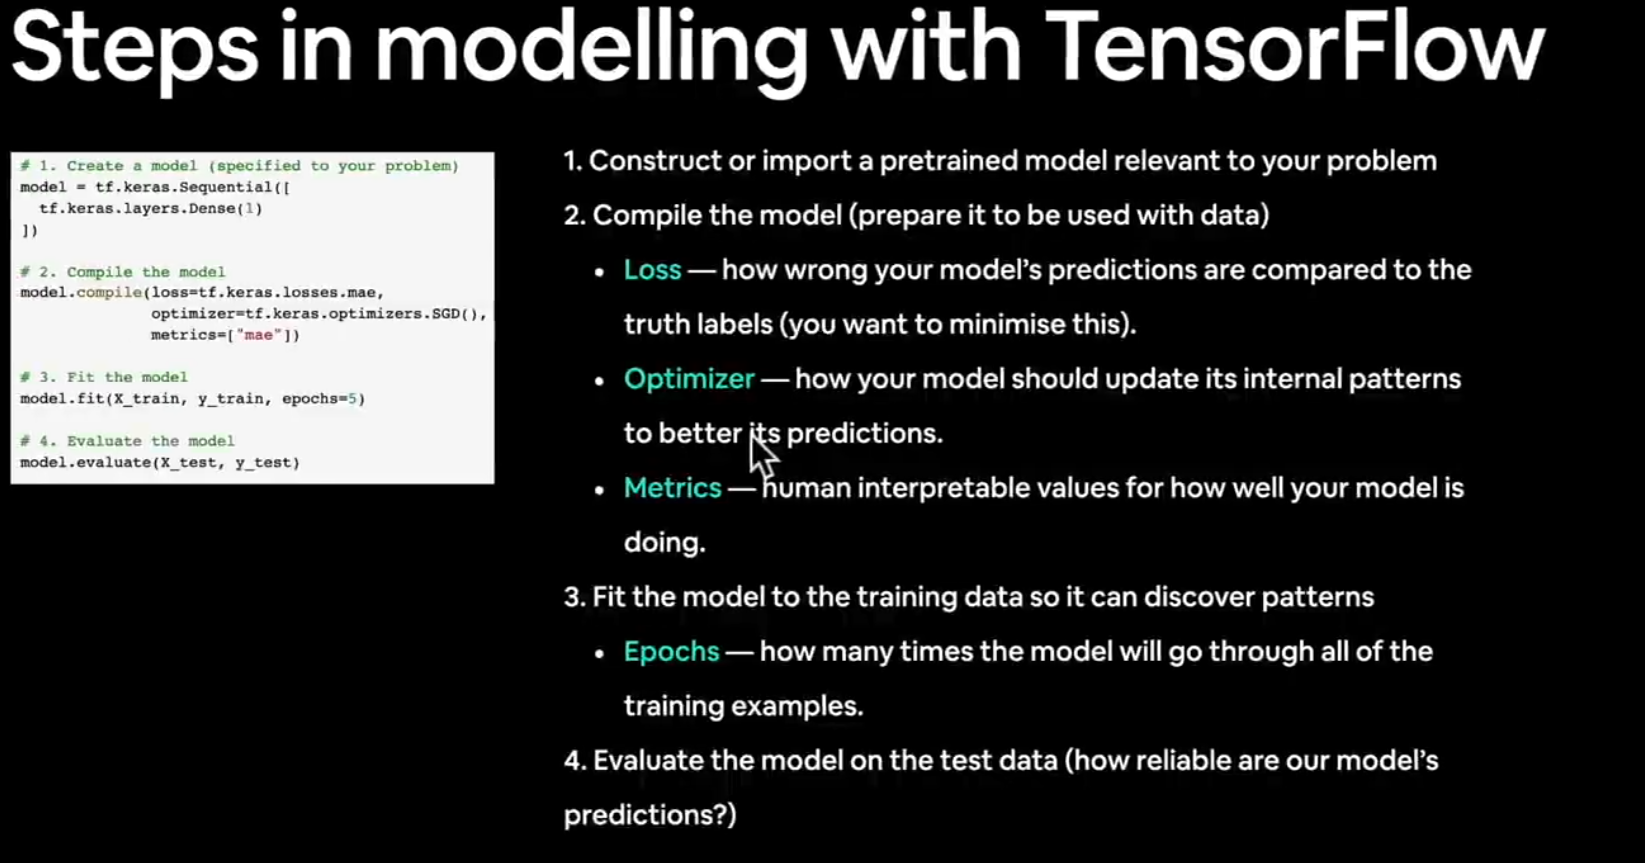



## Improving our model
We can improve our model, by altering the steps we took to
create a model.
1. * *Creating a model* * — here we might add more layers,
increase the number of hidden units (all called neurons )
within each of the hideen layers, change the activation
function of each layer.

2. * *Compiling a model* * — here we might change the
optimization function or perhaps the ** learning rate* * of the
optimization function.

3. * *Fitting a model ** — here we might fit a model for more **epochs** (leave it training for longer) or on more data
(give the model more examples to learn from)

In [ ]:
X,y

(array([[-10.],
        [ -7.],
        [ -4.],
        [ -1.],
        [  2.],
        [  5.],
        [  8.]], dtype=float32),
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 1.,  3.,  6.,  9., 12., 15., 18.], dtype=float32)>)

In [ ]:
# create the model
model2=tf.keras.Sequential([
tf.keras.layers.Dense(100,activation="relu"),
tf.keras.layers.Dense(100,activation="relu"),
tf.keras.layers.Dense(100,activation="relu"),
tf.keras.layers.Dense(1)
]);
# compile the model
model2.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics="mae");
# Fit  the model 
model2.fit(X,y,epochs=200)


Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 9.2181 - mae: 9.2181
Epoch 2/200
1/1 [==============================] - 0s 16ms/step - loss: 7.7068 - mae: 7.7068
Epoch 3/200
1/1 [==============================] - 0s 12ms/step - loss: 7.0284 - mae: 7.0284
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 5.1269 - mae: 5.1269
Epoch 5/200
1/1 [==============================] - 0s 13ms/step - loss: 4.2765 - mae: 4.2765
Epoch 6/200
1/1 [==============================] - 0s 17ms/step - loss: 4.4796 - mae: 4.4796
Epoch 7/200
1/1 [==============================] - 0s 18ms/step - loss: 4.1531 - mae: 4.1531
Epoch 8/200
1/1 [==============================] - 0s 15ms/step - loss: 3.7293 - mae: 3.7293
Epoch 9/200
1/1 [==============================] - 0s 11ms/step - loss: 3.6697 - mae: 3.6697
Epoch 10/200
1/1 [==============================] - 0s 12ms/step - loss: 4.2934 - mae: 4.2934
Epoch 11/200
1/1 [==============================] - 0s 19ms/step - loss

In [ ]:
# predict Value
model2.predict([11.0])

1/1 [==============================] - 0s 428ms/step


array([[21.171679]], dtype=float32)

###Common ways to improve a deep model:(changing heyparameters)
• Adding layers

• Increase the number of hidden units

• Change the activation functions

• Change the optimization function

• Change the learning rate

• Fitting on more data

• Fitting for longer


## Evaluting a model ("Visualize, visualize, visualize")
In practice, a typical workflow  when building neural networks is:
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it  -> ....

It's a good idea to visualize:

 • The data - what data are we working with? What does it look like?

 • The model itself - what does our model look like?

 • The training of a moc : - how does a model perform while it learns?

 • The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?


In [ ]:
# Get a bigger dataSet 
tf.random.set_seed(77)
X=tf.range(-100,100,dtype=tf.float32)
X

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([-100.,  -99.,  -98.,  -97.,  -96.,  -95.,  -94.,  -93.,  -92.,
        -91.,  -90.,  -89.,  -88.,  -87.,  -86.,  -85.,  -84.,  -83.,
        -82.,  -81.,  -80.,  -79.,  -78.,  -77.,  -76.,  -75.,  -74.,
        -73.,  -72.,  -71.,  -70.,  -69.,  -68.,  -67.,  -66.,  -65.,
        -64.,  -63.,  -62.,  -61.,  -60.,  -59.,  -58.,  -57.,  -56.,
        -55.,  -54.,  -53.,  -52.,  -51.,  -50.,  -49.,  -48.,  -47.,
        -46.,  -45.,  -44.,  -43.,  -42.,  -41.,  -40.,  -39.,  -38.,
        -37.,  -36.,  -35.,  -34.,  -33.,  -32.,  -31.,  -30.,  -29.,
        -28.,  -27.,  -26.,  -25.,  -24.,  -23.,  -22.,  -21.,  -20.,
        -19.,  -18.,  -17.,  -16.,  -15.,  -14.,  -13.,  -12.,  -11.,
        -10.,   -9.,   -8.,   -7.,   -6.,   -5.,   -4.,   -3.,   -2.,
         -1.,    0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,
          8.,    9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,
         17.,   18.,   19.,   20.,   21., 

In [ ]:
y=X+10
y

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([-90., -89., -88., -87., -86., -85., -84., -83., -82., -81., -80.,
       -79., -78., -77., -76., -75., -74., -73., -72., -71., -70., -69.,
       -68., -67., -66., -65., -64., -63., -62., -61., -60., -59., -58.,
       -57., -56., -55., -54., -53., -52., -51., -50., -49., -48., -47.,
       -46., -45., -44., -43., -42., -41., -40., -39., -38., -37., -36.,
       -35., -34., -33., -32., -31., -30., -29., -28., -27., -26., -25.,
       -24., -23., -22., -21., -20., -19., -18., -17., -16., -15., -14.,
       -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,
        -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,
         9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,
        20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,
        31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
        42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,
   

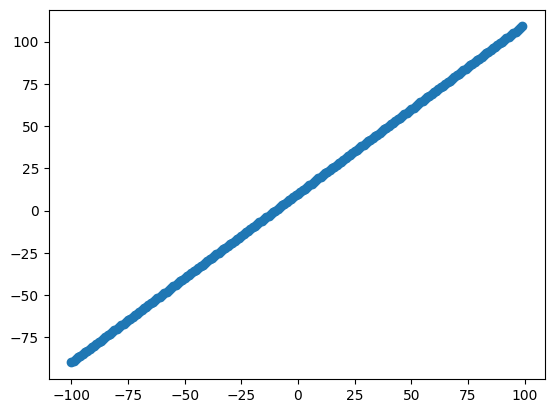

In [ ]:
plt.scatter(X,y)

In [58]:
# Split out Data into Train& test datasets:
X_train=X[:160];
X_test=X[160:];
y_train=y[:160];
y_test=y[160:];

In [59]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

(TensorShape([160]), TensorShape([160]), TensorShape([40]), TensorShape([40]))

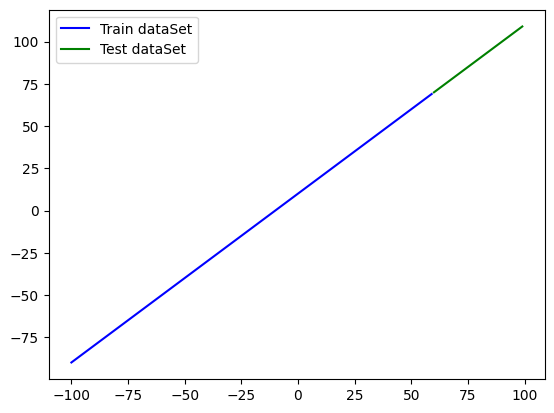

In [60]:
plt.figure()
plt.plot(X_train,y_train,c='b',label='Train dataSet')
plt.plot(X_test,y_test,c='g',label='Test dataSet')
plt.legend()


In [128]:
from os import name
# Build NN :
  # Create the model:
model=tf.keras.Sequential([
        tf.keras.layers.Dense(10,activation='relu',input_shape=[1],name='alpha'),
        tf.keras.layers.Dense(1,name='beta')
       ],name='gamma_model')
  # compile the model:
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.01),
              metrics=tf.keras.metrics.mae)

  # Fit it to the data:
model.fit(X_train,y_train,epochs=100,verbose=1)# verbose=0 no fiting trace

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 43.1170 - mean_absolute_error: 43.1170
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 34.2244 - mean_absolute_error: 34.2244
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 24.8372 - mean_absolute_error: 24.8372
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 15.6817 - mean_absolute_error: 15.6817
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 7.5584 - mean_absolute_error: 7.5584
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 5.8714 - mean_absolute_error: 5.8714
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 6.2536 - mean_absolute_error: 6.2536
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 4.9755 - mean_absolute_error: 4.9755
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 4.8882 - mean_absolute_error: 4.8882
Epoch 10/100
5/5 [==

In [129]:
model.summary()

Model: "gamma_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 alpha (Dense)               (None, 10)                20        
                                                                 
 beta (Dense)                (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


• Total params - total number of parameters in the model.

• Trainable parameters these are the parameters (patterns) the model can update as it trains.

• Non-trainable params - these parameters aren't updated during training (this is typical when you parameters from other models during transfer learning).



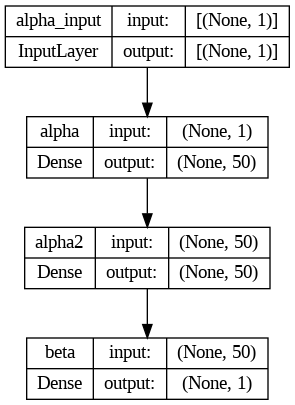

In [119]:
# Visualize our model 
tf.keras.utils.plot_model(model=model,show_shapes='true')

Well through this visualization we can see that this model containts : 

* An input layer with an input of 1
  
*   One hiden layer with an input of 1 and an output of 5 (the number of Unit / Neurone on that layer)

* An output layer with an input of 5 and an output of 1.
  

###Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you 'll see this in the form of y_ tests or y_true versus y_pred (ground truth versus your model 's predictions)

In [130]:
# Make Some predictions.
y_pred=model.predict(y_test)
y_pred

2/2 [==============================] - 0s 4ms/step


array([[ 80.382866],
       [ 81.39428 ],
       [ 82.405685],
       [ 83.41708 ],
       [ 84.4285  ],
       [ 85.4399  ],
       [ 86.4513  ],
       [ 87.46271 ],
       [ 88.47411 ],
       [ 89.48552 ],
       [ 90.496925],
       [ 91.50834 ],
       [ 92.51974 ],
       [ 93.53114 ],
       [ 94.54255 ],
       [ 95.553955],
       [ 96.56536 ],
       [ 97.57676 ],
       [ 98.588165],
       [ 99.59957 ],
       [100.61098 ],
       [101.62238 ],
       [102.6338  ],
       [103.6452  ],
       [104.6566  ],
       [105.66801 ],
       [106.679405],
       [107.69082 ],
       [108.70223 ],
       [109.71363 ],
       [110.72504 ],
       [111.73644 ],
       [112.74785 ],
       [113.75925 ],
       [114.77067 ],
       [115.78205 ],
       [116.793465],
       [117.80488 ],
       [118.816284],
       [119.82769 ]], dtype=float32)

In [132]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     prediction_labels=y_pred):
  plt.figure(figsize=(10,7));
  plt.scatter(train_data,train_labels,c='b',label='Train dataSet');
  plt.scatter(test_data,test_labels,c='g',label='Test dataSet');
  plt.scatter(test_data,prediction_labels,c='y',label='Test dataSet');
  plt.legend();

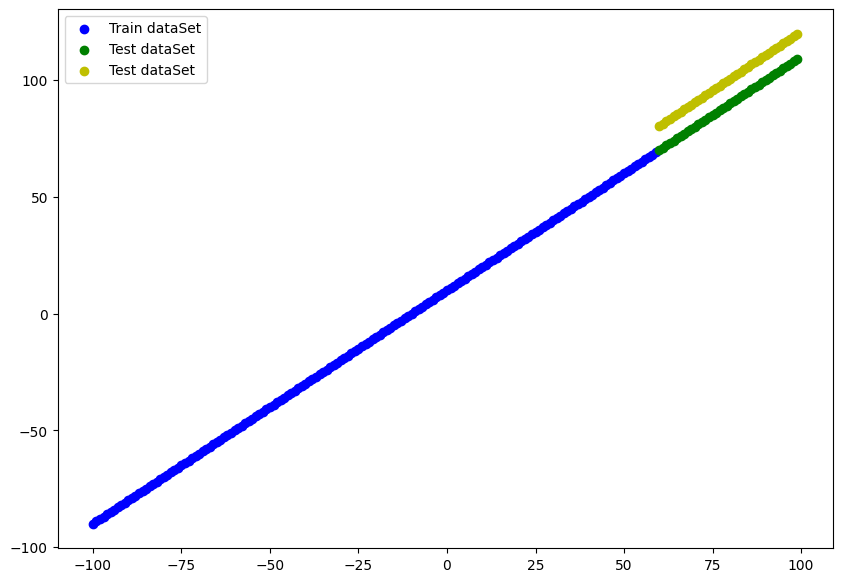

In [133]:
plot_predictions()